<a href="https://colab.research.google.com/github/Janardan-glicth/FirstProject/blob/main/MLpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"janardanupreti","key":"b292a50c0b271eab75535eaafeda84a0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d selfishgene/historical-hourly-weather-data


Dataset URL: https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data
License(s): DbCL-1.0
  0% 0.00/12.0M [00:00<?, ?B/s]
100% 12.0M/12.0M [00:00<00:00, 970MB/s]


In [ ]:
!unzip historical-hourly-weather-data.zip


Archive:  historical-hourly-weather-data.zip
  inflating: city_attributes.csv     
  inflating: humidity.csv            
  inflating: pressure.csv            
  inflating: temperature.csv         
  inflating: weather_description.csv  
  inflating: wind_direction.csv      
  inflating: wind_speed.csv          


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
temp = pd.read_csv("temperature.csv")
humidity = pd.read_csv("humidity.csv")
pressure = pd.read_csv("pressure.csv")
wind = pd.read_csv("wind_speed.csv")

temp.head()


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [ ]:
# Keep only datetime + one city (e.g., Vancouver)
city = "Vancouver"

data = pd.DataFrame()
data["datetime"] = temp["datetime"]
data["temperature"] = temp[city]
data["humidity"] = humidity[city]
data["pressure"] = pressure[city]
data["wind_speed"] = wind[city]

# Remove missing values
data = data.dropna()

data.head()


,datetime,temperature,humidity,pressure,wind_speed
21,2012-10-02 09:00:00,284.590217,87.0,807.0,0.0
22,2012-10-02 10:00:00,284.588174,88.0,849.0,0.0
23,2012-10-02 11:00:00,284.586130,89.0,890.0,0.0
24,2012-10-02 12:00:00,284.584087,89.0,932.0,0.0
25,2012-10-02 13:00:00,284.582043,90.0,973.0,0.0


In [ ]:
X = data[['humidity', 'pressure', 'wind_speed']]
y = data['temperature']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 4.691738982886681
R² Score: 0.1874075870593067


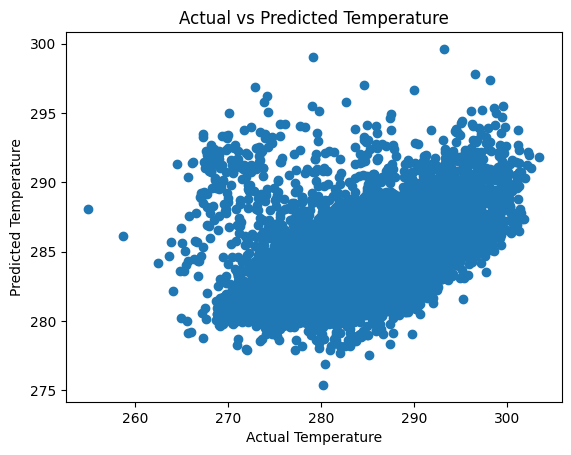

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 358.8221162089154
Coefficients: [-0.19854772 -0.05665811 -0.23669072]
